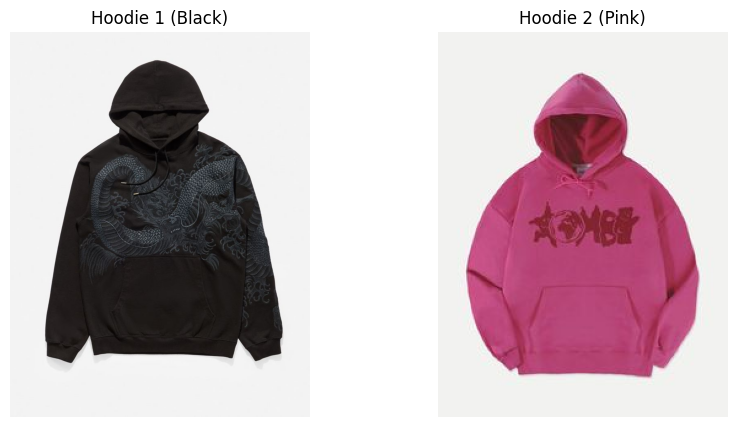

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
image1_path = '/content/0b5e8cf05a0e8fb9e0261b259e8fee43 (1).jpg'
image2_path = '/content/95f7f6fb05d28061872a6fdf0bcb166d.jpg'

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Convert images to RGB (from BGR)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display images
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title('Hoodie 1 (Black)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title('Hoodie 2 (Pink)')
plt.axis('off')

plt.show()


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

# Updated model URL
model_url = "https://tfhub.dev/tensorflow/deeplabv3/1"

# Load the segmentation model
model = hub.load(model_url)

def segment_image(image):
    # Prepare the image for the model
    input_image = tf.image.resize(image, [512, 512])
    input_image = input_image / 255.0
    input_image = tf.expand_dims(input_image, axis=0)

    # Run the model
    result = model(input_image)
    result = tf.argmax(result['semantic'], axis=-1)
    result = tf.squeeze(result).numpy()

    return result

# Function to load and preprocess the images
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# Load images
image1_path = '/mnt/data/0b5e8cf05a0e8fb9e0261b259e8fee43 (1).jpg'
image2_path = '/mnt/data/95f7f6fb05d28061872a6fdf0bcb166d.jpg'

image1 = load_and_preprocess_image(image1_path)
image2 = load_and_preprocess_image(image2_path)

# Display images
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title('Hoodie 1 (Black)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title('Hoodie 2 (Pink)')
plt.axis('off')

plt.show()

# Segment the images
segmented_image1 = segment_image(image1)
segmented_image2 = segment_image(image2)

# Display segmented images
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(segmented_image1)
plt.title('Segmented Hoodie 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image2)
plt.title('Segmented Hoodie 2')
plt.axis('off')

plt.show()


OSError: https://tfhub.dev/tensorflow/deeplabv3/1 does not appear to be a valid module.

In [4]:
!pip install transformers
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
    

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/utils/deprecation.py:165: UserWarning: The following named arguments are not valid for `SegformerFeatureExtractor.__init__` and were ignored: 'feature_extractor_type'
  return func(*args, **kwargs)


config.json:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

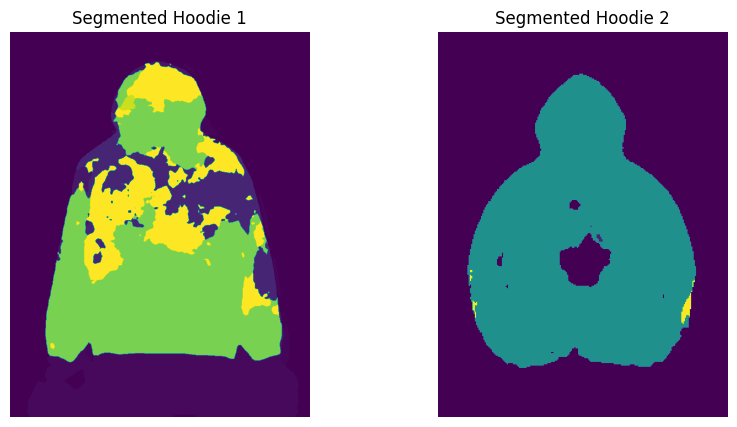

In [2]:
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
import torch

# Load the feature extractor and model
feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")

def segment_image(image):
    # Prepare the image for the model
    inputs = feature_extractor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    upsampled_logits = torch.nn.functional.interpolate(logits, size=image.shape[:2], mode='bilinear', align_corners=False)
    segmentation = upsampled_logits.argmax(dim=1)[0]
    return segmentation.numpy()

# Segment the images
segmented_image1 = segment_image(image1)
segmented_image2 = segment_image(image2)

# Display segmented images
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(segmented_image1)
plt.title('Segmented Hoodie 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image2)
plt.title('Segmented Hoodie 2')
plt.axis('off')

plt.show()


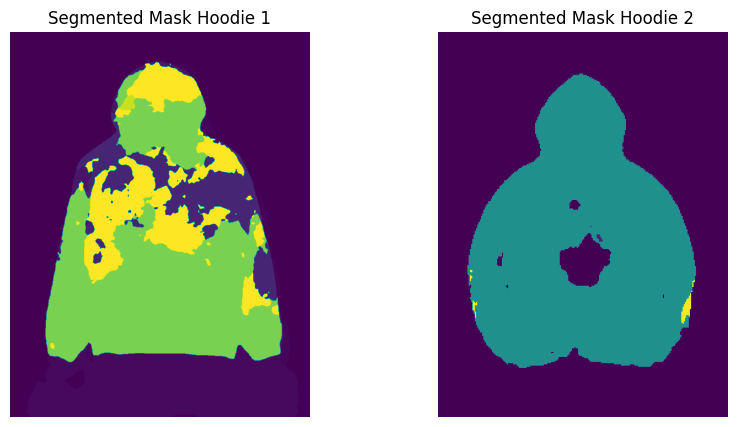

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation

# Load the feature extractor and model
feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")

def segment_image(image):
    # Prepare the image for the model
    inputs = feature_extractor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    upsampled_logits = torch.nn.functional.interpolate(logits, size=image.shape[:2], mode='bilinear', align_corners=False)
    segmentation = upsampled_logits.argmax(dim=1)[0]
    return segmentation.numpy()

# Segment the images
segmented_image1 = segment_image(image1)
segmented_image2 = segment_image(image2)

# Display the segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(segmented_image1)
plt.title('Segmented Mask Hoodie 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image2)
plt.title('Segmented Mask Hoodie 2')
plt.axis('off')

plt.show()


In [5]:
# Check unique part IDs in the segmented masks
unique_parts1 = np.unique(segmented_image1)
unique_parts2 = np.unique(segmented_image2)

print("Unique part IDs in Hoodie 1:", unique_parts1)
print("Unique part IDs in Hoodie 2:", unique_parts2)


Unique part IDs in Hoodie 1: [  0   2   3   7  12  92 106 115]
Unique part IDs in Hoodie 2: [ 2  4 12 22]


In [7]:
# Adjust these based on the actual output of the unique parts check
PARTS_HOODIE_1 = {
    "Front Body": 3,  # Assuming 3 corresponds to Front Body
    "Hood": 7,        # Assuming 7 corresponds to Hood
    "Pocket": 12,     # Assuming 12 corresponds to Pocket
    "Waistband": 92,  # Assuming 92 corresponds to Waistband
    "Cuff": 106,      # Assuming 106 corresponds to Cuff
    "Sleeve": 115,    # Assuming 115 corresponds to Sleeve
}

PARTS_HOODIE_2 = {
    "Front Body": 2,  # Assuming 2 corresponds to Front Body
    "Hood": 4,        # Assuming 4 corresponds to Hood
    "Pocket": 12,     # Assuming 12 corresponds to Pocket
    # Adjust based on the available part IDs
}

print(PARTS_HOODIE_1)
print(PARTS_HOODIE_2)


{'Front Body': 3, 'Hood': 7, 'Pocket': 12, 'Waistband': 92, 'Cuff': 106, 'Sleeve': 115}
{'Front Body': 2, 'Hood': 4, 'Pocket': 12}


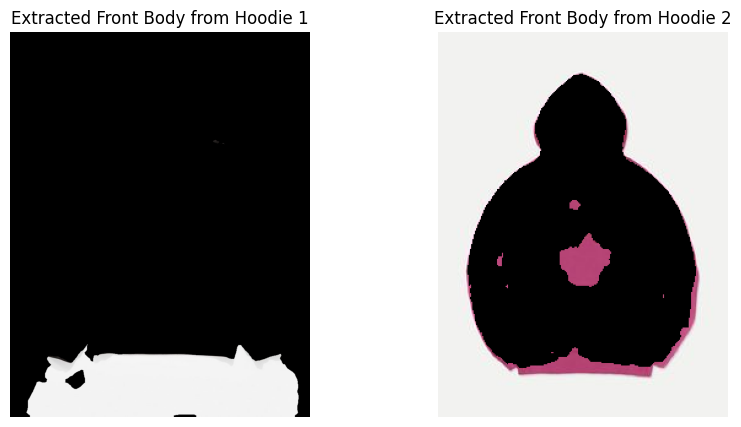

In [8]:
def extract_part(image, mask, part_id):
    # Create a binary mask for the specific part
    part_mask = mask == part_id
    part_image = image * np.expand_dims(part_mask, axis=-1)
    return part_image

# Extract parts from both images using adjusted part IDs
extracted_parts1 = {part: extract_part(image1, segmented_image1, part_id) for part, part_id in PARTS_HOODIE_1.items()}
extracted_parts2 = {part: extract_part(image2, segmented_image2, part_id) for part, part_id in PARTS_HOODIE_2.items()}

# Display extracted parts (for one example part)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(extracted_parts1["Front Body"])
plt.title('Extracted Front Body from Hoodie 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(extracted_parts2["Front Body"])
plt.title('Extracted Front Body from Hoodie 2')
plt.axis('off')

plt.show()


Parts for Hoodie 1:


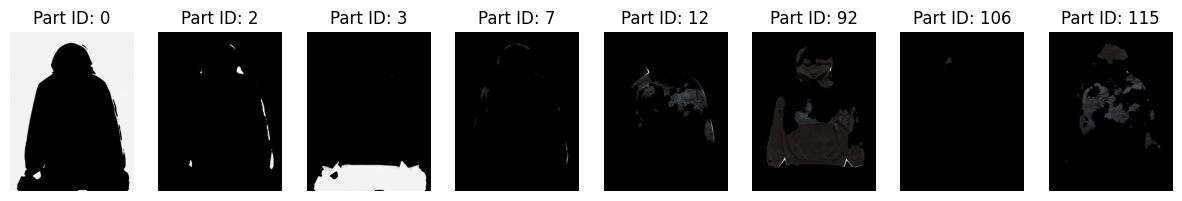

Parts for Hoodie 2:


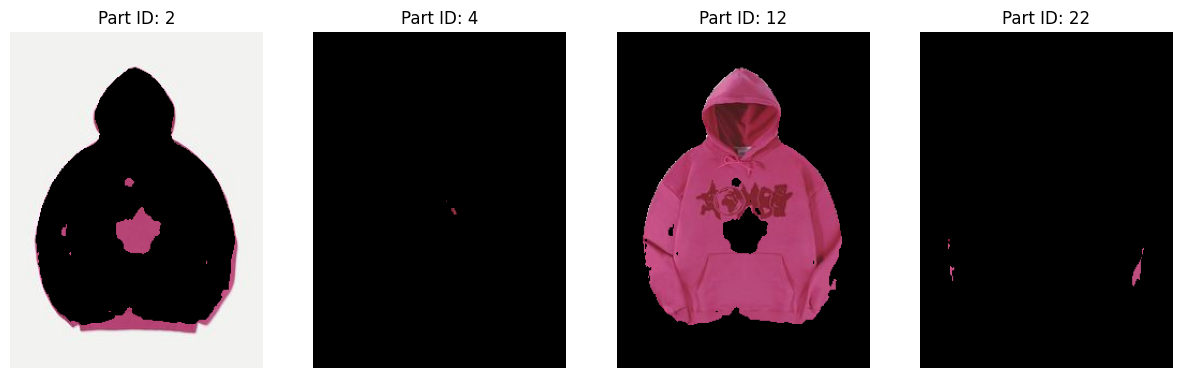

In [9]:
def visualize_parts(image, mask):
    unique_parts = np.unique(mask)
    fig, axes = plt.subplots(1, len(unique_parts), figsize=(15, 5))
    for i, part_id in enumerate(unique_parts):
        part_mask = mask == part_id
        part_image = image * np.expand_dims(part_mask, axis=-1)
        axes[i].imshow(part_image)
        axes[i].set_title(f'Part ID: {part_id}')
        axes[i].axis('off')
    plt.show()

# Visualize parts for Hoodie 1
print("Parts for Hoodie 1:")
visualize_parts(image1, segmented_image1)

# Visualize parts for Hoodie 2
print("Parts for Hoodie 2:")
visualize_parts(image2, segmented_image2)


In [15]:
!git clone https://github.com/xuebinqin/U-2-Net.git
!pip install -r U-2-Net/requirements.txt


fatal: destination path 'U-2-Net' already exists and is not an empty directory.
  Using cached numpy-1.15.2.zip (4.5 MB)
  Preparing metadata (setup.py) ... done
  Using cached scikit-image-0.14.0.tar.gz (27.0 MB)
  Preparing metadata (setup.py) ... done
  Using cached Pillow-8.1.1.tar.gz (45.0 MB)
  Preparing metadata (setup.py) ... done
  Using cached paddlepaddle-2.6.1-cp310-cp310-manylinux1_x86_64.whl.metadata (8.6 kB)
  Using cached paddlehub-2.4.0-py3-none-any.whl.metadata (1.7 kB)
  Using cached gradio-4.40.0-py3-none-any.whl.metadata (15 kB)
  Using cached pywavelets-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.0 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3

In [14]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from U_2_Net.model import U2NET  # Load the U2NET model from the cloned repo

# Load the U2-Net model
model = U2NET(3, 1)
model.load_state_dict(torch.load('U-2-Net/saved_models/u2net.pth', map_location=torch.device('cpu')))
model.eval()

def preprocess_image(image):
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((320, 320)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return transform(image).unsqueeze(0)

def segment_image(image, model):
    input_image = preprocess_image(image)
    with torch.no_grad():
        outputs = model(input_image)
    prediction = outputs[0][:, 0, :, :]
    return prediction.squeeze().cpu().numpy()

# Segment the images
segmented_image1 = segment_image(image1, model)
segmented_image2 = segment_image(image2, model)

# Display the segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(segmented_image1, cmap='gray')
plt.title('Segmented Mask Hoodie 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image2, cmap='gray')
plt.title('Segmented Mask Hoodie 2')
plt.axis('off')

plt.show()


ModuleNotFoundError: No module named 'U_2_Net'